<a href="https://colab.research.google.com/github/krishpatel1077/CS4342-krish/blob/master/CS4342_Assignment3_Krish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CS4342 Assignment 3 Applied Questions
##Question 1a

              Year         Lag1         Lag2         Lag3         Lag4  \
count  1089.000000  1089.000000  1089.000000  1089.000000  1089.000000   
mean   2000.048669     0.150585     0.151079     0.147205     0.145818   
std       6.033182     2.357013     2.357254     2.360502     2.360279   
min    1990.000000   -18.195000   -18.195000   -18.195000   -18.195000   
25%    1995.000000    -1.154000    -1.154000    -1.158000    -1.158000   
50%    2000.000000     0.241000     0.241000     0.241000     0.238000   
75%    2005.000000     1.405000     1.409000     1.409000     1.409000   
max    2010.000000    12.026000    12.026000    12.026000    12.026000   

              Lag5       Volume        Today  
count  1089.000000  1089.000000  1089.000000  
mean      0.139893     1.574618     0.149899  
std       2.361285     1.686636     2.356927  
min     -18.195000     0.087465   -18.195000  
25%      -1.166000     0.332022    -1.154000  
50%       0.234000     1.002680     0.241000  
75% 

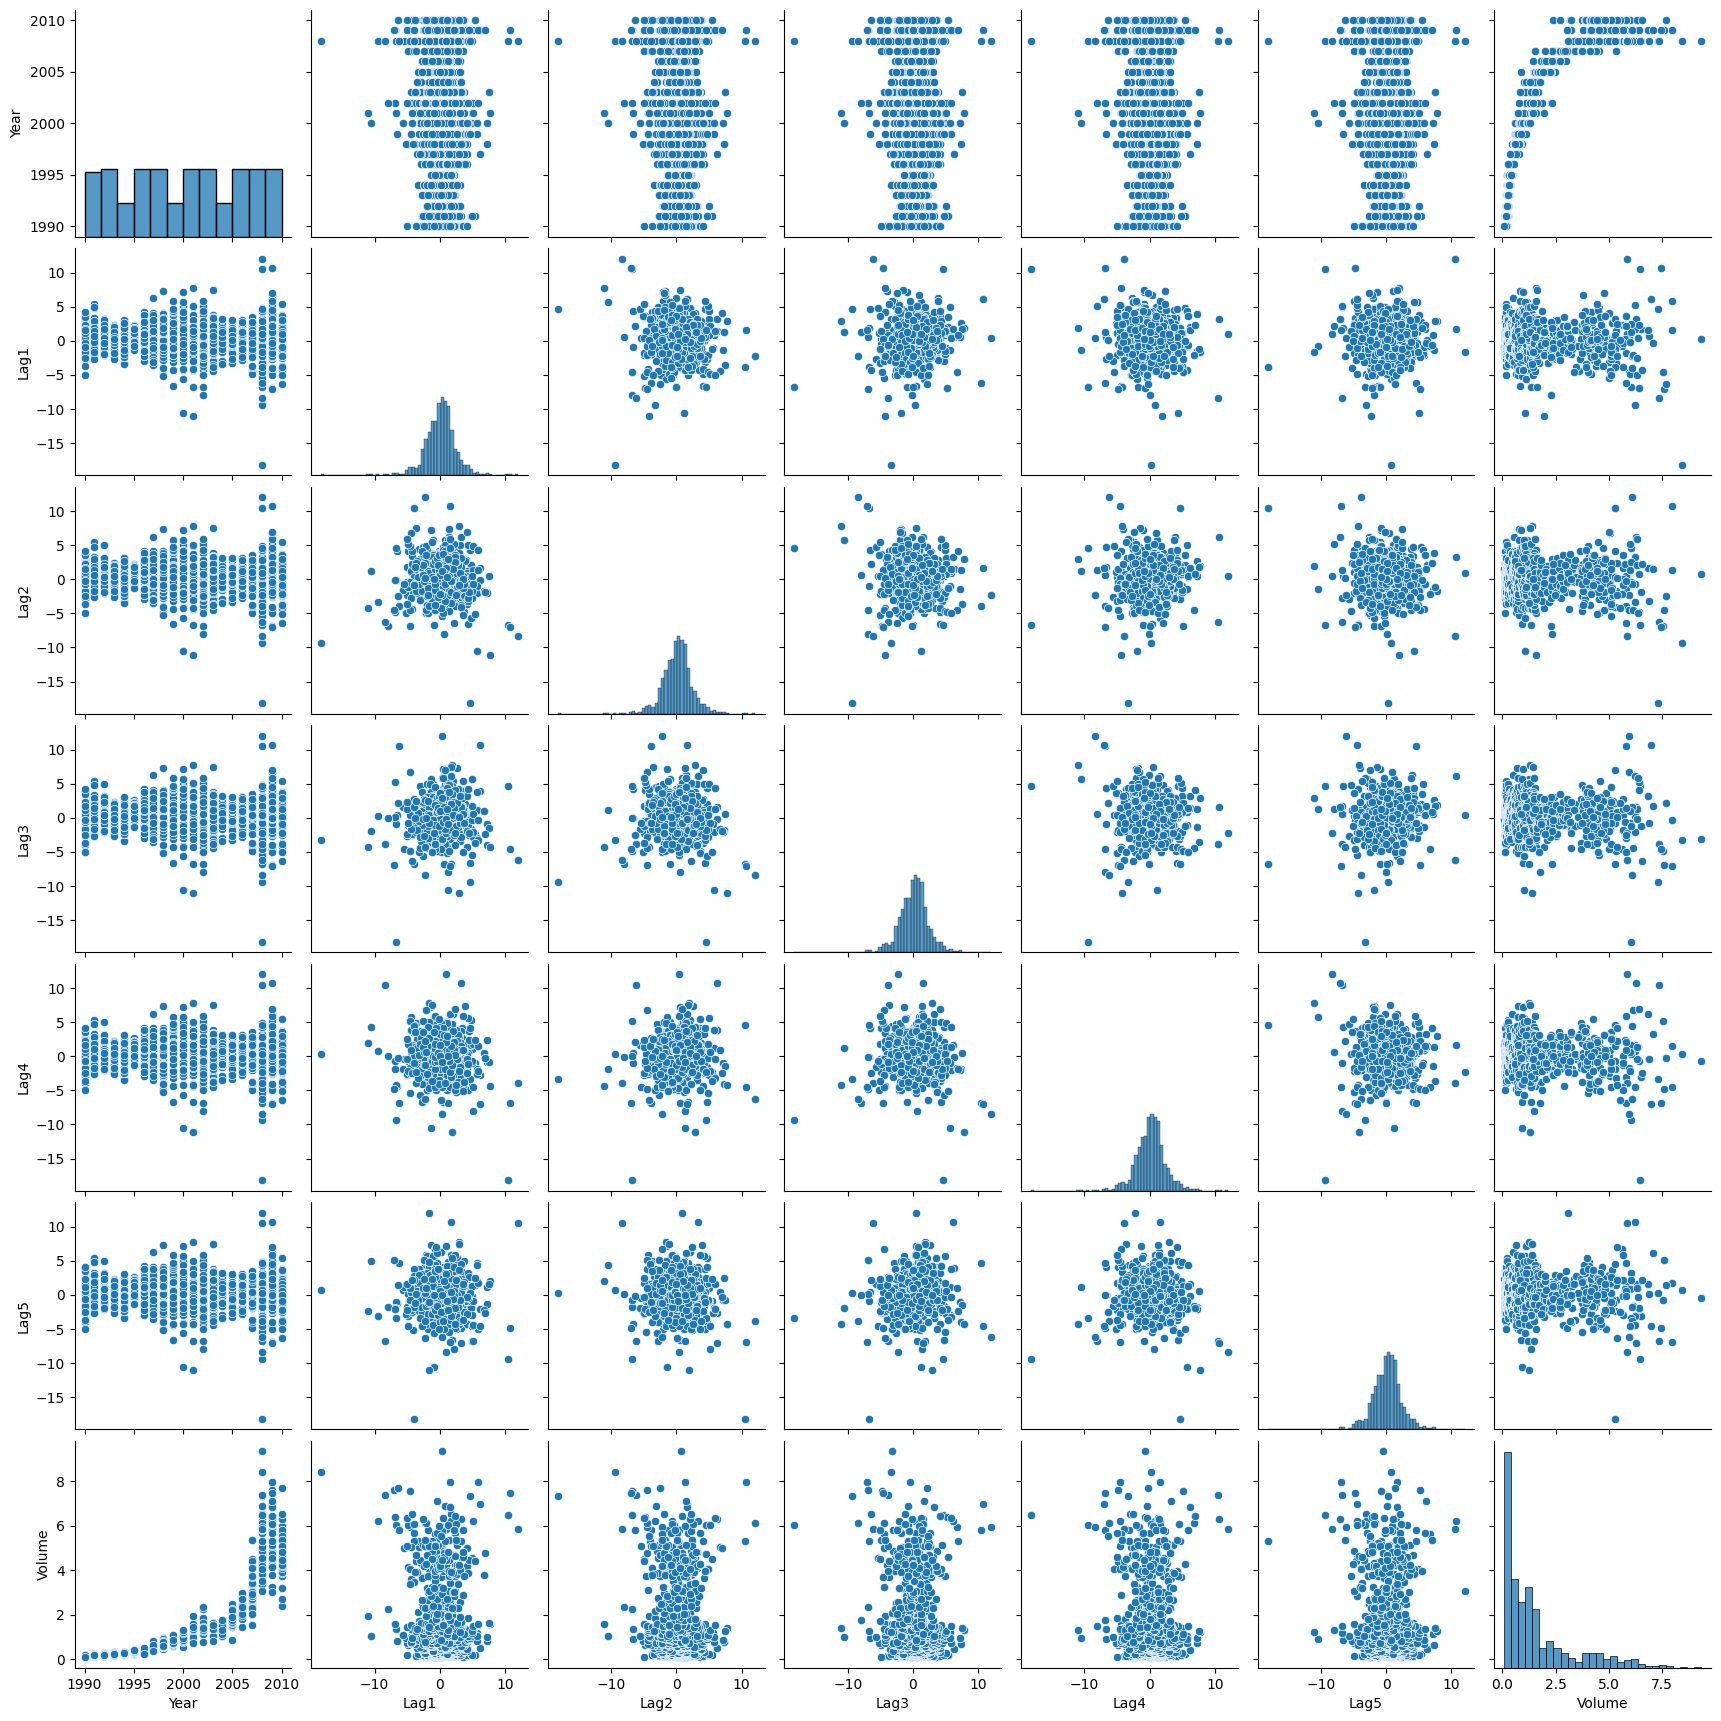

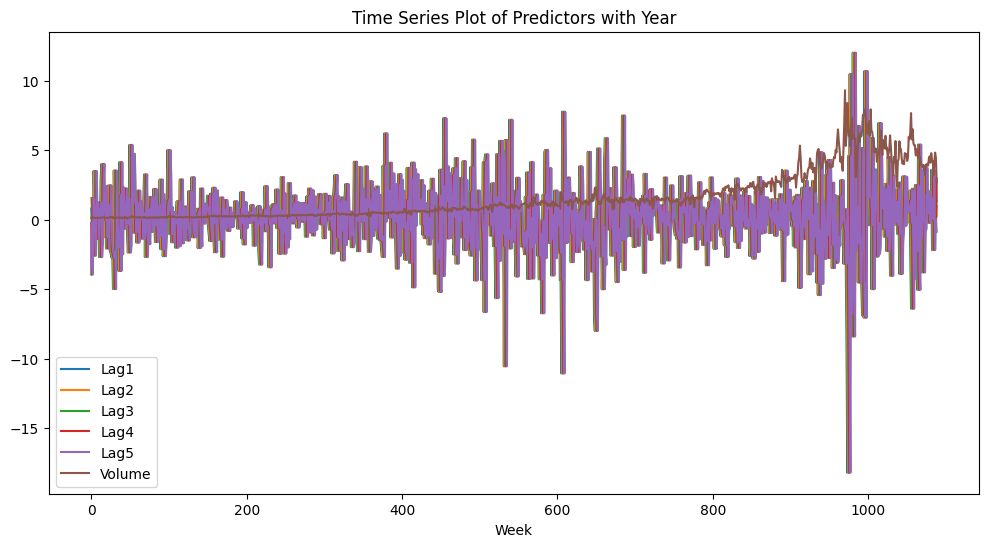

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('Weekly.csv')

# Summary statistics
summary = data.describe()
print(summary)

# Pairplot to visualize relationships between predictors including 'Year'
sns.pairplot(data, vars=['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume'])
plt.show()

# Time series plot for Lag variables and Volume, including 'Year'
plt.figure(figsize=(12, 6))
plt.plot(data['Lag1'], label='Lag1')
plt.plot(data['Lag2'], label='Lag2')
plt.plot(data['Lag3'], label='Lag3')
plt.plot(data['Lag4'], label='Lag4')
plt.plot(data['Lag5'], label='Lag5')
plt.plot(data['Volume'], label='Volume')
plt.legend()
plt.xlabel('Week')
plt.title('Time Series Plot of Predictors with Year')
plt.show()


The only visible pattern of note is the relationship between volume and year, as the volume increases exponentially over the years. Beyond that, there are no noticeable patterns in the dataset

##Question 1b

In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# Load the dataset
data = pd.read_csv('Weekly.csv')

# Convert 'Direction' to binary (1 for 'Up', 0 for 'Down')
data['Direction_binary'] = pd.get_dummies(data['Direction'], drop_first=True)

# Define predictors
predictors = ['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']

# Create the design matrix
X = data[predictors]
y = data['Direction_binary']

# Fit logistic regression model
logit_model = LogisticRegression(max_iter=10000)  # Increase max_iter for convergence
logit_model.fit(X, y)

# Extract coefficients and p-values
coefficients = logit_model.coef_[0]
p_values = logit_model.predict_proba(X)

# Display coefficients and p-values
print("Coefficients:")
for i in range(len(predictors)):
    print(f"{predictors[i]}: {coefficients[i]}")

print("\nP-values:")
for i in range(len(p_values[0])):
    print(f"{predictors[i]}: {p_values[0][i]}")


Coefficients:
Lag1: -0.04123853734927522
Lag2: 0.05840383510648819
Lag3: -0.01605138403838536
Lag4: -0.0277624265904903
Lag5: -0.014463019826850694
Volume: -0.022709629396715655

P-values:
Lag1: 0.3914145841368798
Lag2: 0.6085854158631202


Lag 2 has a positive relationship with Direction, while the rest all have negative relationships with Direciton. Neither Lag 1 or Lag 2 has a p-value < 0.05, so neither relationship is statistically significant.

##Question 1c

In [3]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Assuming you have predictions available
# Replace predicted_values with the actual predicted values from the logistic regression model
predicted_values = logit_model.predict(X)

# Compute confusion matrix
conf_matrix = confusion_matrix(y, predicted_values)

# Compute overall accuracy
accuracy = accuracy_score(y, predicted_values)

print("Confusion Matrix:")
print(conf_matrix)
print("\nOverall Accuracy:", accuracy)


Confusion Matrix:
[[ 54 430]
 [ 48 557]]

Overall Accuracy: 0.5610651974288338


From the matrix, we can see the following:
True Positives: 557
True Negatives: 54
False Positives: 430
False Negatives: 48

This means the model correctly predicted "Up" 557 times, "Down" 54 times, picked UP when it should've been DOWN 430 times, and picked DOWN when it should've been up 48 times.

##Question 1D

In [4]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

# Load the dataset
data = pd.read_csv('Weekly.csv')

# Convert 'Direction' to binary (1 for 'Up', 0 for 'Down')
data['Direction_binary'] = pd.get_dummies(data['Direction'], drop_first=True)

# Filter the training data (1990 to 2008) and test data (2009 and 2010)
train_data = data[data['Year'].between(1990, 2008)]
test_data = data[data['Year'].between(2009, 2010)]

# Define predictors for training and testing
train_X = train_data[['Lag2']]
train_y = train_data['Direction_binary']
test_X = test_data[['Lag2']]
test_y = test_data['Direction_binary']

# Fit logistic regression model with 'Lag2' as the predictor
logit_model = LogisticRegression(max_iter=10000)  # Increase max_iter for convergence
logit_model.fit(train_X, train_y)

# Predict using the test data
predicted_values = logit_model.predict(test_X)

# Compute confusion matrix for the test data
conf_matrix = confusion_matrix(test_y, predicted_values)

# Compute overall accuracy for the test data
accuracy = accuracy_score(test_y, predicted_values)

print("Confusion Matrix:")
print(conf_matrix)
print("\nOverall Accuracy:", accuracy)


Confusion Matrix:
[[ 9 34]
 [ 5 56]]

Overall Accuracy: 0.625


##Question 1E

In [5]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Fit LDA model with 'Lag2' as the predictor
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(train_X, train_y)

# Predict using the test data
lda_predicted_values = lda_model.predict(test_X)

# Compute confusion matrix for LDA on the test data
lda_conf_matrix = confusion_matrix(test_y, lda_predicted_values)

# Compute overall accuracy for LDA on the test data
lda_accuracy = accuracy_score(test_y, lda_predicted_values)

print("LDA Confusion Matrix:")
print(lda_conf_matrix)
print("\nLDA Overall Accuracy:", lda_accuracy)


LDA Confusion Matrix:
[[ 9 34]
 [ 5 56]]

LDA Overall Accuracy: 0.625


##Question 1F

In [6]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Fit QDA model with 'Lag2' as the predictor
qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(train_X, train_y)

# Predict using the test data
qda_predicted_values = qda_model.predict(test_X)

# Compute confusion matrix for QDA on the test data
qda_conf_matrix = confusion_matrix(test_y, qda_predicted_values)

# Compute overall accuracy for QDA on the test data
qda_accuracy = accuracy_score(test_y, qda_predicted_values)

print("QDA Confusion Matrix:")
print(qda_conf_matrix)
print("\nQDA Overall Accuracy:", qda_accuracy)


QDA Confusion Matrix:
[[ 0 43]
 [ 0 61]]

QDA Overall Accuracy: 0.5865384615384616


##Question 1G

In [7]:
from sklearn.neighbors import KNeighborsClassifier

# Fit KNN model with 'Lag2' as the predictor
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(train_X, train_y)

# Predict using the test data
knn_predicted_values = knn_model.predict(test_X)

# Compute confusion matrix for KNN on the test data
knn_conf_matrix = confusion_matrix(test_y, knn_predicted_values)

# Compute overall accuracy for KNN on the test data
knn_accuracy = accuracy_score(test_y, knn_predicted_values)

print("KNN Confusion Matrix:")
print(knn_conf_matrix)
print("\nKNN Overall Accuracy:", knn_accuracy)


KNN Confusion Matrix:
[[22 21]
 [32 29]]

KNN Overall Accuracy: 0.49038461538461536


##Question 1H

Looking at the systems, we can see that the LDA model has the best response, with an accuracy of 0.625, similat to the Logistic Regression. the QDA has approximately 0.59, and the KNN has around 0.49, rendering both systems inaccurate overall

##Question 2a

In [8]:
import pandas as pd

# Load the Auto dataset
auto_data = pd.read_csv('Auto.csv')

# Calculate the median of the 'mpg' column
mpg_median = auto_data['mpg'].median()

# Create the binary variable mpg01
auto_data['mpg01'] = (auto_data['mpg'] > mpg_median).astype(int)

# Create a single dataset containing mpg01 and other Auto variables
auto_data_combined = auto_data.drop(columns=['mpg'])  # Drop original 'mpg' column


##Question 2b

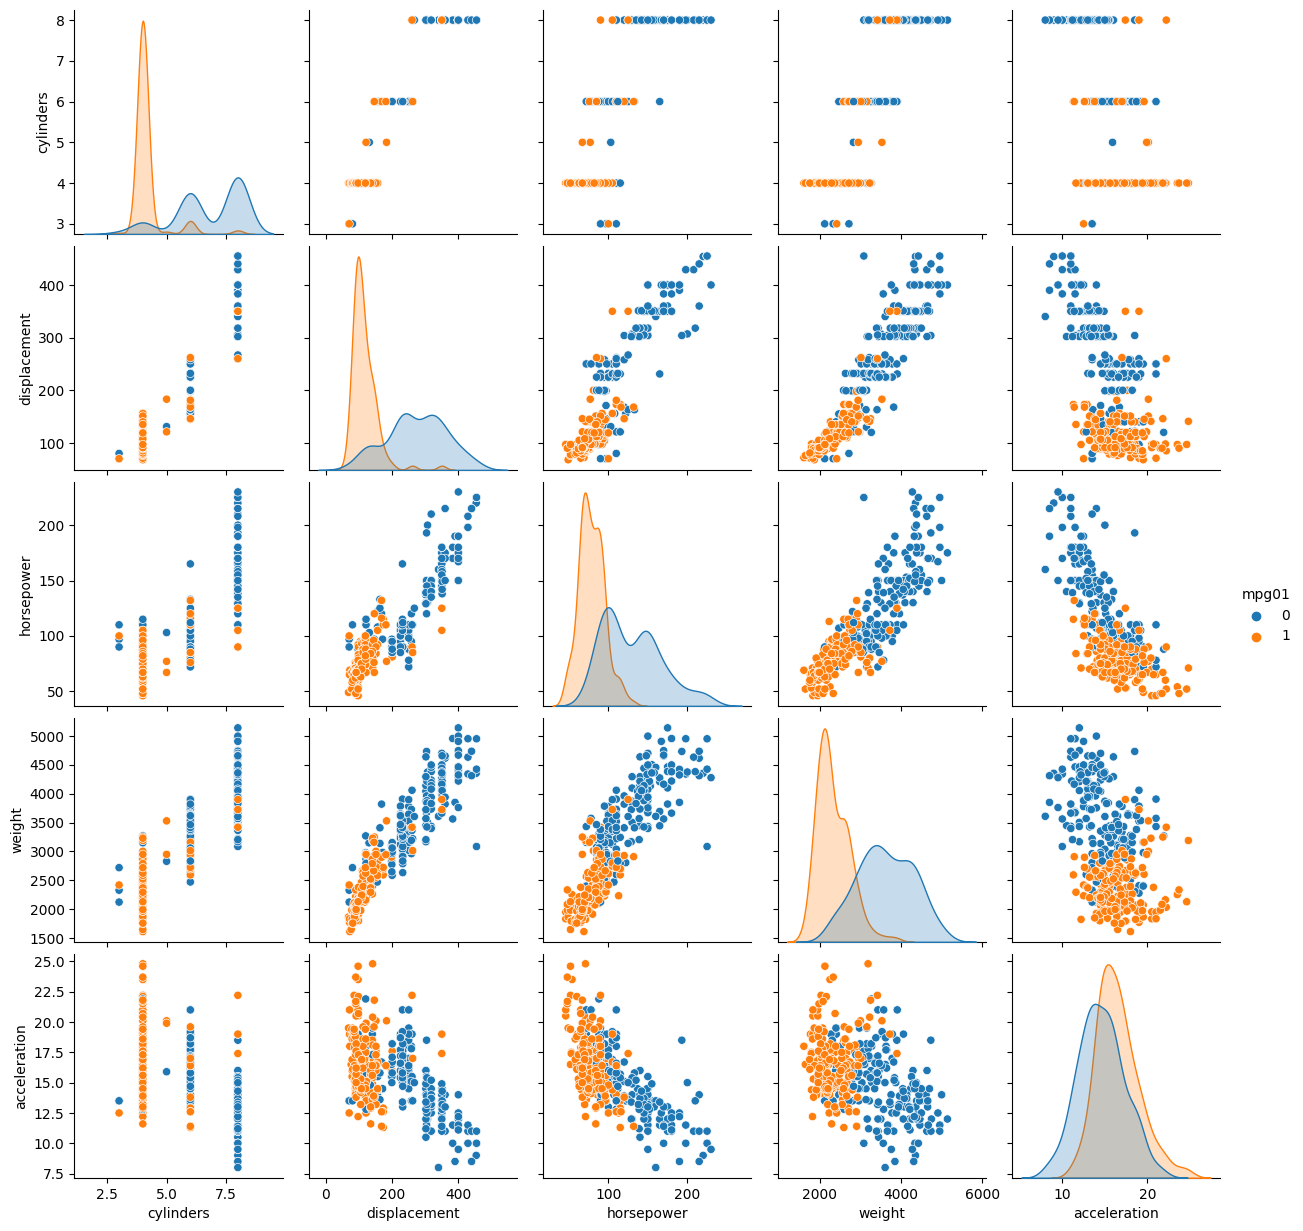

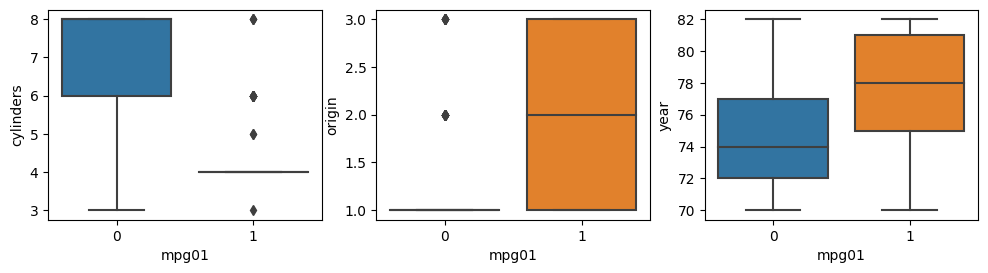

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatterplots for continuous variables against mpg01
sns.pairplot(auto_data_combined, hue='mpg01', vars=['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration'])
plt.show()

# Boxplots for categorical variables against mpg01
plt.figure(figsize=(12, 6))
plt.subplot(2, 3, 1)
sns.boxplot(x='mpg01', y='cylinders', data=auto_data_combined)
plt.subplot(2, 3, 2)
sns.boxplot(x='mpg01', y='origin', data=auto_data_combined)
plt.subplot(2, 3, 3)
sns.boxplot(x='mpg01', y='year', data=auto_data_combined)
plt.show()


It can be assumed from the data that the mpg01 has a positive relationship with year and origin, and has a negative relationship with cylinders. This is inferred from the scatterplots

##Question 2c

In [11]:
from sklearn.model_selection import train_test_split

# Define the features (X) and the target variable (y)
X = auto_data_combined.drop(columns=['mpg01'])  # Features excluding 'mpg01'
y = auto_data_combined['mpg01']  # Target variable 'mpg01'

# Split the data into a training set (80%) and a test set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and test sets to verify the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (313, 8)
X_test shape: (79, 8)
y_train shape: (313,)
y_test shape: (79,)


##Question 2D

In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

# Selecting 'year' and 'origin' as predictors
selected_features = ['year', 'origin']

# Subset the training and test data using the selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Initialize and fit LDA model using the selected features
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train_selected, y_train)

# Predict on the test data
lda_predicted_values = lda_model.predict(X_test_selected)

# Compute test error (1 - accuracy)
test_error = 1 - accuracy_score(y_test, lda_predicted_values)

print("Test Error:", test_error)


Test Error: 0.25316455696202533


##Question 2E

In [14]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Selecting 'year' and 'origin' as predictors
selected_features = ['year', 'origin']

# Subset the training and test data using the selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Initialize and fit QDA model using the selected features
qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_train_selected, y_train)

# Predict on the test data
qda_predicted_values = qda_model.predict(X_test_selected)

# Compute test error (1 - accuracy)
test_error = 1 - accuracy_score(y_test, qda_predicted_values)

print("Test Error:", test_error)


Test Error: 0.22784810126582278


##Question 2F

In [15]:
from sklearn.linear_model import LogisticRegression

# Selecting 'year' and 'origin' as predictors
selected_features = ['year', 'origin']

# Subset the training and test data using the selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Initialize and fit Logistic Regression model using the selected features
logreg_model = LogisticRegression(max_iter=10000)
logreg_model.fit(X_train_selected, y_train)

# Predict on the test data
logreg_predicted_values = logreg_model.predict(X_test_selected)

# Compute test error (1 - accuracy)
test_error = 1 - accuracy_score(y_test, logreg_predicted_values)

print("Test Error:", test_error)


Test Error: 0.25316455696202533
